### Modelling

In [276]:
# Sampling libraries
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from sklearn.model_selection import train_test_split
from Eda import *
from sklearn.utils import resample

# sklearn packages for Decision Tree
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc 
from sklearn.metrics import roc_auc_score

# sklearn packages for Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import StandardScaler

# sklearn packages for KNNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance

# sklearn packages for NN
from sklearn.neural_network import MLPClassifier

# Set print options
pd.set_option('display.max_columns', None)

from tqdm import tqdm

In [231]:
df = df[['address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'guardian', 'traveltime', 'famsup', 'internet', 'famrel', 'G3']]

X = df.drop('G3', axis=1).values
y = df['G3'].values

In [232]:
def evaluate_model(model, X_test, y_test):
    
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=1).item()
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=1).item()
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1).item()
    auc_roc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr').item()

    # Return the results
    return {
        'Model': model.__class__.__name__,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'AUC': auc_roc
    }

In [233]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [234]:
X_resampled, y_resampled = resample(X_train, y_train, replace=True, n_samples=20000, random_state=42)

#### Decision tree

In [235]:
# for i in range(1, 100):
#     for j in range(1, 15):
#         X_train_i, X_test_i, y_train_i, y_test_i = train_test_split(X, y, test_size=0.2, random_state=i)
#         clf = DecisionTreeClassifier(criterion="entropy", max_depth=j)
#         clf.fit(X_train_i, y_train_i)
#         if evaluate_model(clf, X_test_i, y_test_i)['Accuracy'] > 0.54:
#             print(i)
#             print(j)
#             print(evaluate_model(clf, X_test_i, y_test_i))
#             break

In [251]:
X_train_i, X_test_i, y_train_i, y_test_i = train_test_split(X, y, test_size=0.2, random_state=32)
clf = DecisionTreeClassifier(criterion="entropy", max_depth=df.columns.size - 2)
clf.fit(X_train_i, y_train_i)

DecisionTreeClassifier(criterion='entropy', max_depth=11)

In [252]:
# # for i in range(1, 100):
#     for j in range(1, 15):
#         X_train_i, X_test_i, y_train_i, y_test_i = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=i)
#         clf = DecisionTreeClassifier(criterion="entropy", max_depth=j)
#         clf.fit(X_train_i, y_train_i)
#         if evaluate_model(clf, X_test_i, y_test_i)['Accuracy'] > 0.54:
#             print(i)
#             print(j)
#             print(evaluate_model(clf, X_test_i, y_test_i))
#             break

In [253]:
# plot a confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, title=None, cmap=plt.cm.Blues):
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

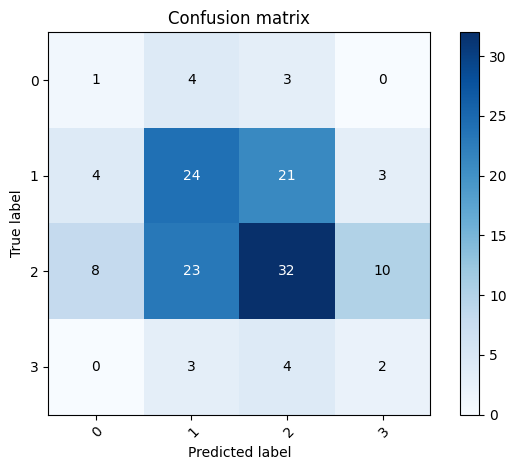

In [255]:
plot_confusion_matrix(y_test_i, clf.predict(X_test_i), classes=['0', '1', '2', '3'], normalize=False, title='Confusion matrix')
plt.show()

In [256]:
def plot_feature_importance(featImportLst):
    fig, ax = plt.subplots(ncols=1, figsize=(15, 5))
    fig.suptitle('Feature Importance for Different Dataframes')

    features = df[['address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'guardian', 'traveltime', 'famsup', 'internet', 'famrel']].columns
    importances = featImportLst
    indices = np.argsort(importances)

    ax.barh(features[indices], importances[indices])
    ax.set(xlabel='Importance', ylabel='Feature', title='Feature Importance')

    fig.tight_layout()
    plt.show()

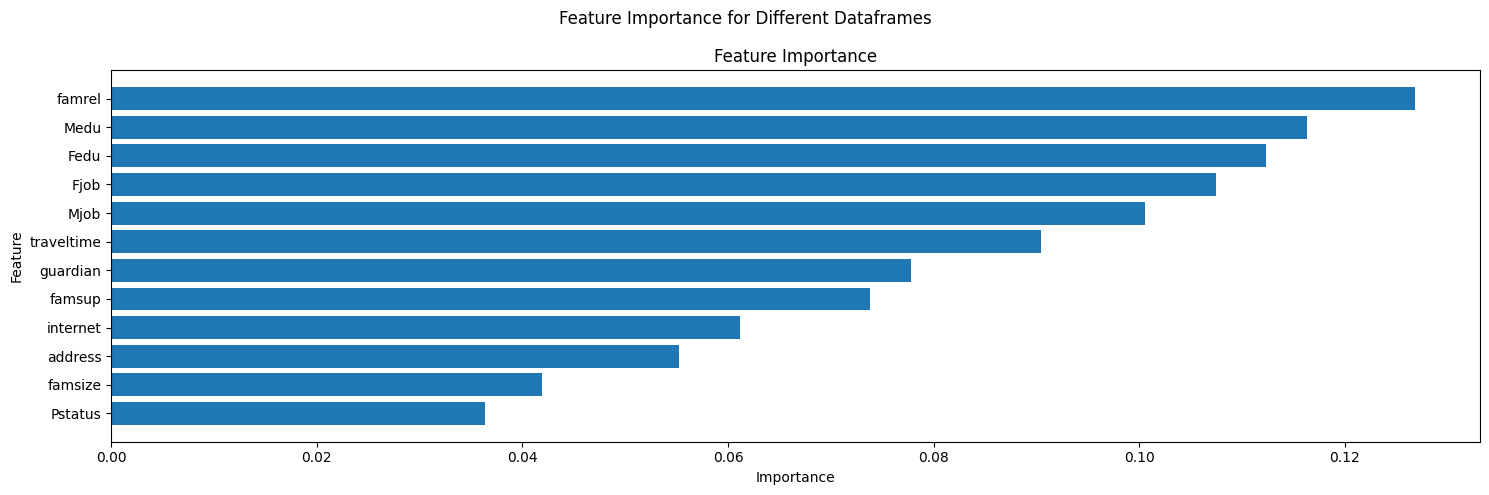

In [257]:
plot_feature_importance(clf.feature_importances_)

#### Random Forest

In [265]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [266]:
rf = RandomForestClassifier()

# fit and predict
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# calculate the R^2 score
rsquared = rf.score(X_test, y_test)
y_test += 1
y_pred += 1

rel_error = np.mean(np.abs(y_test - y_pred) / y_test)
rel_error_med = np.median(np.abs(y_test - y_pred) / y_test)
rel_quan = np.quantile(np.abs(y_test - y_pred) / y_test, [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

print(f'Relative error: {rel_error * 100 :.3f} %')
print(f'Relative median error: {rel_error_med * 100 :.3f} %')
print(rel_quan * 100, '%')
print(f'R squared: {rsquared:.3f}')

Relative error: 23.509 %
Relative median error: 25.000 %
[ 0.          0.          0.         20.         25.         25.
 33.33333333 33.33333333 50.        ] %
R squared: 0.394


In [259]:
# fig, ax = plt.subplots(ncols=1, figsize=(9,5))
# fig.suptitle(f'True vs predicted')
# ax.plot(y_test, y_pred, '.', markersize = 10, alpha = .6)
# ax.set(xlabel = 'True value', ylabel = 'Predicted value', title = 'Validation data')
# fig.tight_layout()

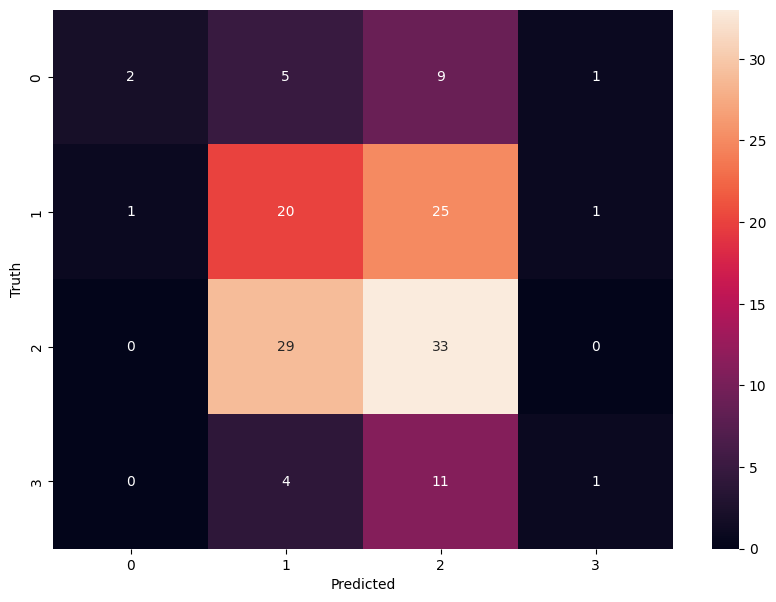

In [267]:
# plot a confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

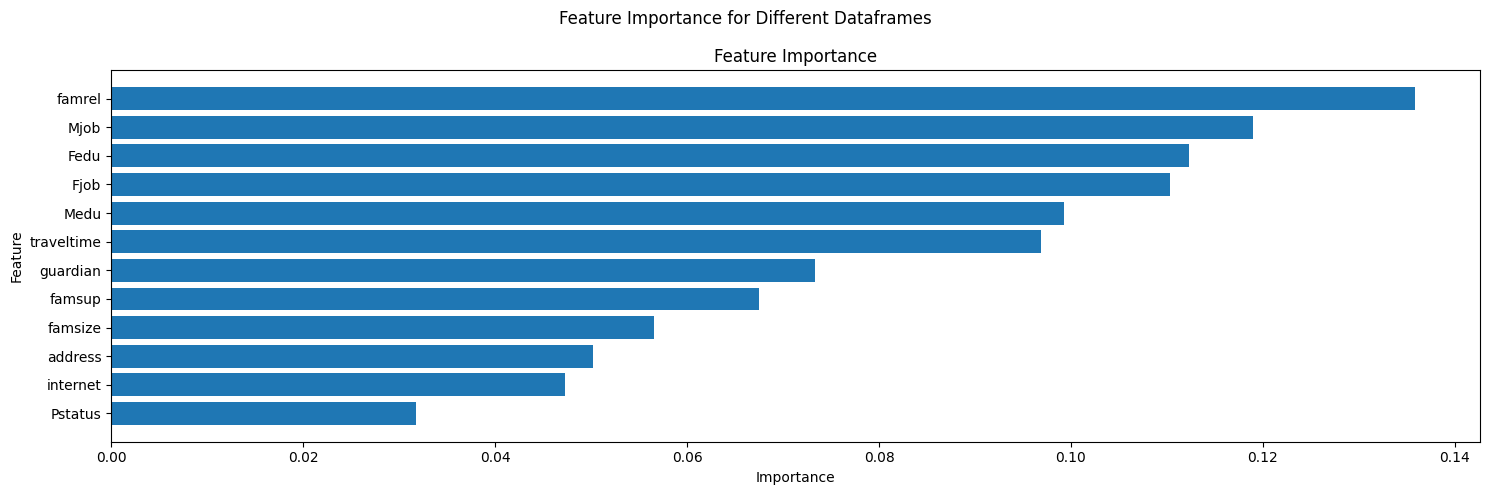

In [268]:
plot_feature_importance(rf.feature_importances_)


#### KNN

In [269]:
X_train_i, X_test_i, y_train_i, y_test_i = train_test_split(X, y, test_size=0.2, random_state=42)
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean', weights='distance')
scaler = StandardScaler()

scaler.fit(X_train_i)
X_train_std = scaler.transform(X_train_i)

knn.fit(X_train_std, y_train_i)

X_test_std = scaler.transform(X_test_i)

y_S_pred_2 = knn.predict(X_test_std)

print(evaluate_model(knn, X_test_i, y_test_i))

{'Model': 'KNeighborsClassifier', 'Accuracy': 0.4225352112676056, 'Precision': 0.5419547588561674, 'Recall': 0.4225352112676056, 'F1 Score': 0.32624733910710635, 'AUC': 0.5154598332483121}


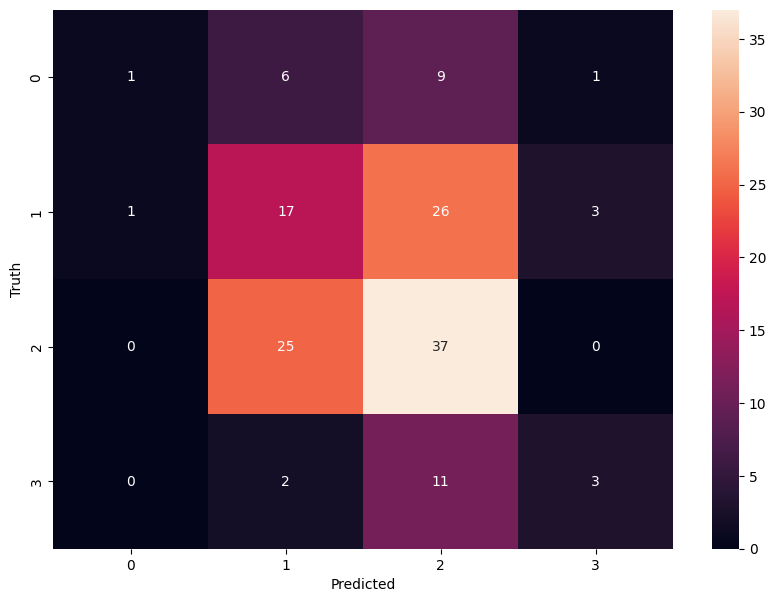

In [270]:
# plot a confusion matrix for KNN
cm = confusion_matrix(y_test_i, y_S_pred_2)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

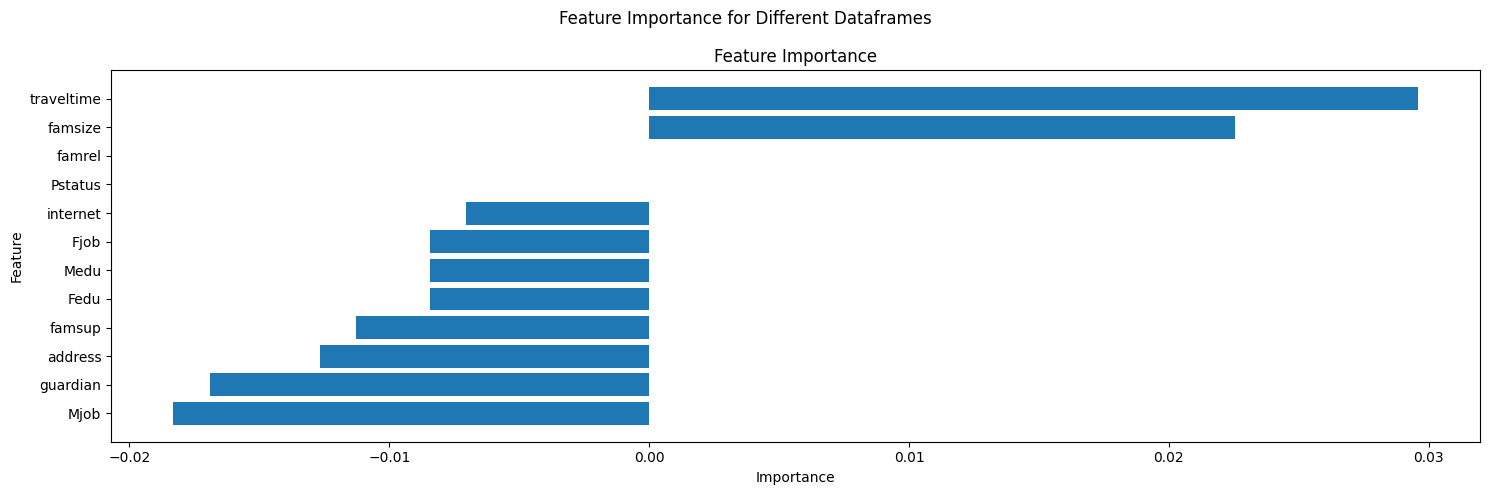

In [281]:
perm_importance = permutation_importance(knn, X_test_i, y_test_i, scoring='accuracy')
plot_feature_importance(perm_importance.importances_mean)

In [ ]:
# ## for i in tqdm (range(1, 100)):
#    ## for j in range(10, 30):

#         X_train_i, X_test_i, y_train_i, y_test_i = train_test_split(X, y, test_size=0.2, random_state=i)
#         knn = KNeighborsClassifier(n_neighbors=j, metric='euclidean', weights='distance')
#         scaler = StandardScaler()

#         scaler.fit(X_train_i)
#         X_train_std = scaler.transform(X_train_i)

#         knn.fit(X_train_std, y_train_i)

#         X_test_std = scaler.transform(X_test_i)

#         y_S_pred_2 = knn.predict(X_test_std)

#         if evaluate_model(knn, X_test_i, y_test_i)['Accuracy'] > 0.55:
#             print(i)
#             print(j)
#             print(evaluate_model(knn, X_test_i, y_test_i))
#             print()
#             break


In [272]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [273]:
# for i in tqdm (range(1, 10)):
nn = MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=10000, activation='logistic', solver='lbfgs', learning_rate='adaptive')

nn.fit(X_train, y_train)
f = nn.predict(X_test)

# if nn.score(X_test, y_test) > 0.5:
# print(i)
print(nn.score(X_test, y_test))
print(nn.loss_)
#print(f)

0.34507042253521125
0.10776293524139367


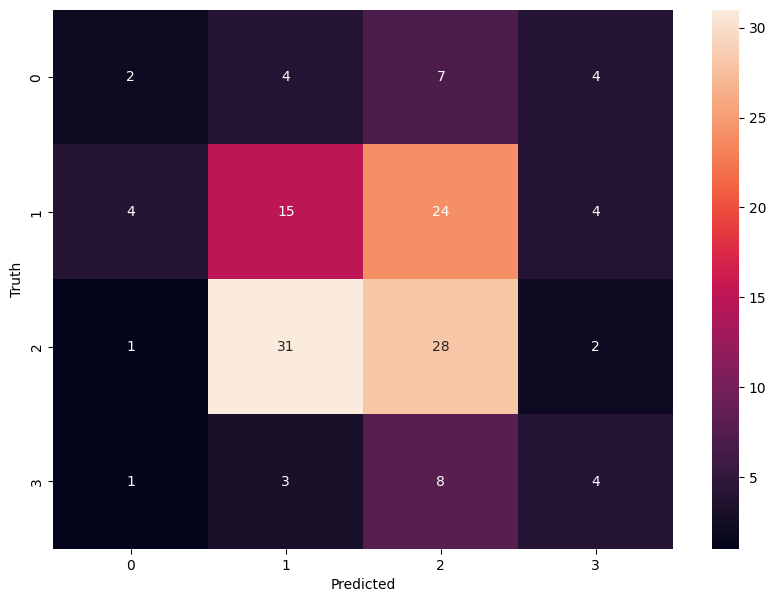

In [274]:
# plot a confusion matrix for NN
cm = confusion_matrix(y_test, f)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()


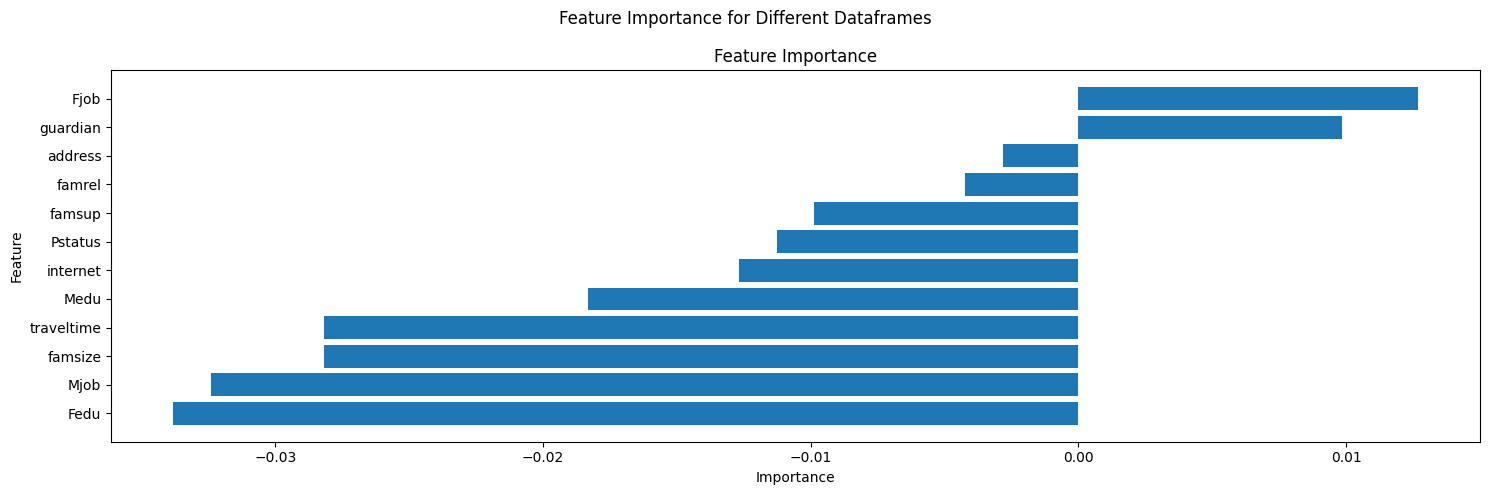

In [282]:
perm_importance = permutation_importance(nn, X_test, y_test, scoring='accuracy')
plot_feature_importance(perm_importance.importances_mean)